# PROJECT-2. Подгрузка новых данных. Уточнение анализа

## Введение. Знакомство с датасетом

Большинство крупных компаний хранят данные в реляционных базах, так как в таком виде они более структурированы и адаптированы для внешних систем, с помощью которых, как правило, данные в базу и заносятся. В системах с такими базами данных имеют значение именно отношения между сущностями. Если вам понадобилось, например, посчитать статистику по заказам, то здесь важны отношения: заказ, клиент, товар и т. д.

Мы переделали уже знакомый вам по предыдущему проекту датасет hh.ru в реляционный, чтобы вы могли попрактиковаться и в этой области.

Представьте, что вы работаете в некотором дата-центре по трудоустройству, куда стекаются данные с различных платформ для найма. Вам необходимо познакомиться с данными, понять, с какими резюме вы имеете дело, а дальше собрать статистику для различных кадровых агентств и статистических центров.

Вы получите данные по возрасту кандидатов, по городам с наиболее активным рынком труда, поймёте специфику найма (где какие вакансии более активны), а также узнаете желаемые позиции для тех или иных кандидатов.

Проект включает в себя несколько этапов:

* знакомство с датасетом;
* предварительный анализ данных;
* анализ кандидатов;
* глобальный анализ показателей.

В качестве итогового задания проекта вы подготовите текстовый Google-документ, в котором по каждой встречающейся вам в этом модуле задаче приведёте ваш ответ в формате:

* номер задания;
* код с пояснениями;
* результат запроса (в виде таблицы);
* общий вывод в конце по результатам анализа рынка труда.

## ЗНАКОМСТВО С ДАТАСЕТОМ

Напоминаем, что датасет, с которым мы будем работать, уже вам знаком. Мы взяли те же данные HeadHunter, только разбили их по таблицам и перенесли в БД SQL. Такой процесс называется нормализацией (вы можете почитать про неё дополнительно, если вам понадобятся знания по проектированию баз данных).

На диаграмме мы видим четыре таблицы:

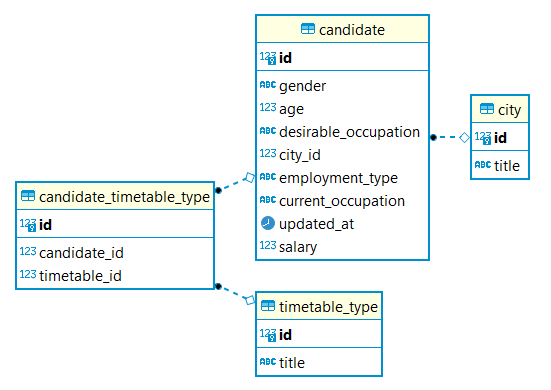

### CANDIDATE

Таблица хранит в себе общие данные по кандидатам: id, пол, возраст, желаемая должность, город, вид занятости, текущая должность, дата обновления записи и зарплата.

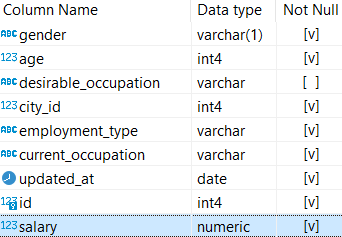

### CITY

city — таблица-справочник для наших кандидатов — хранит код города и его название.

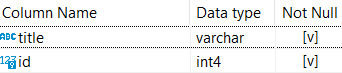

### CANDIDATE_TIMETABLE_TYPE

Это дополнительная таблица. Она существует для организации связи многие-ко-многим, так как у нас есть много кандидатов и у них может быть несколько подходящих типов рабочего графика.

Примечание. Нам стоило бы вынести в дополнительную таблицу и колонку employment_type из таблицы candidate, так как вид связи здесь одинаковый, но мы решили оставить всё как есть, так как это даст нам дополнительные возможности для постановки интересных задач и проведения изысканий.

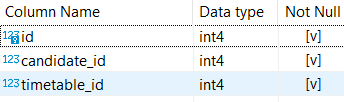

### TIMETABLE_TYPE

Это таблица-справочник вариантов рабочего графика, подходящего кандидату.

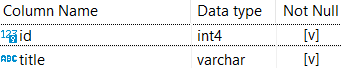

_________
## Предварительный анализ данных

Для начала давайте познакомимся с общей информацией по кандидатам и попытаемся оценить адекватность данных. Начнём с возраста.

Рассчитайте максимальный возраст (max_age) кандидата в таблице.

        select
                max(age)
        from   
                hh.candidate

Теперь давайте рассчитаем минимальный возраст (min_age) кандидата в таблице.

        select
                min(age)
        from 
                hh.candidate

Попробуем «почистить» данные. Напишите запрос, который позволит посчитать для каждого возраста (age) сколько (cnt) человек этого возраста у нас есть.
Отсортируйте результат по возрасту в обратном порядке.

        select
                    c.age,
                    count(c.age) as cnt
        from 
                    hh.candidate as c
        group by c.age
        order by age desc

Что в итоге?

100 среди значений возраста встречается только один раз, в то время как остальные данные похожи на правду. Значит, при необходимости анализировать возраст в дальнейших подсчётах лучше отбрасывать это число.

По данным Росстата, средний возраст занятых в экономике России составляет 39.7 лет. Мы округлим это значение до 40. Найдите количество кандидатов, которые старше данного возраста. Не забудьте отфильтровать «ошибочный» возраст 100.

        select
            count(c.age)
        from
            hh.candidate as c
        where c.age != '100' and c.age > 40

_______
## Глобальный анализ показателей

Для начала напишите запрос, который позволит узнать, сколько (cnt) у нас кандидатов из каждого города (city).  
Формат выборки: city, cnt.  
Группировку таблицы необходимо провести по столбцу title, результат отсортируйте по количеству в обратном порядке.  

    select
        c.title as city,
        count(cndt.id) as cnt
    from 
        hh.candidate as cndt
        join hh.city as c on c.id = cndt.city_id
    group by c.title
    order by cnt desc

Москва бросается в глаза как, пожалуй, самый активный рынок труда. Напишите запрос, который позволит понять, каких кандидатов из Москвы устроит «проектная работа».  
Формат выборки: gender, age, desirable_occupation, city, employment_type.  
Отсортируйте результат по id кандидата.  

    select 
        cnd.gender,
        cnd.age,
        cnd.desirable_occupation,
        c.title as city,
        cnd.employment_type
    from 
        hh.candidate as cnd
        full join hh.city as c on c.id = cnd.city_id
    where c.title = 'Москва' and cnd.employment_type like '%проектная работа%'
    order by cnd.id

Данных оказалось многовато. Отфильтруйте только самые популярные IT-профессии — разработчик, аналитик, программист.  
Обратите внимание, что данные названия могут быть написаны как с большой, так и с маленькой буквы.  
Отсортируйте результат по id кандидата.  

    select 
        cnd.gender,
        cnd.age,
        cnd.desirable_occupation,
        c.title as city,
        cnd.employment_type
    from 
        hh.candidate as cnd
    join 
        hh.city as c on c.id = cnd.city_id
    where 
        c.title = 'Москва' 
        and cnd.employment_type like '%проектная работа%' 
        and (
            lower(cnd.desirable_occupation) like '%разработчик%' 
            or lower(cnd.desirable_occupation) like '%аналитик%' 
            or lower(cnd.desirable_occupation) like '%программист%'
            )
    order by cnd.id

Для общей информации попробуйте выбрать номера и города кандидатов, у которых занимаемая должность совпадает с желаемой.  
Формат выборки: id, city.  
Отсортируйте результат по городу и id кандидата.  

    select
        cnd.id,
        c.title as city
    from
        hh.city as c
    join
        hh.candidate as cnd on c.id = cnd.city_id
    where
        cnd.current_occupation = cnd.desirable_occupation
    order by c.title, cnd.id

Определите количество кандидатов пенсионного возраста.   
Пенсионный возраст для мужчин наступает в 65 лет, для женщин — в 60 лет.

    select
        count(*)
    from
        hh.candidate as cnd
    where
        ((cnd.gender = 'M' and cnd.age >= 65) or (cnd.gender = 'F' and cnd.age >= 60)) 
        and cnd.age != '100'

_________
## Анализ кандидатов для заказчиков

Для добывающей компании нам необходимо подобрать кандидатов из Новосибирска, Омска, Томска и Тюмени, которые готовы работать вахтовым методом.  
Формат выборки: gender, age, desirable_occupation, city, employment_type, timetable_type.  
Отсортируйте результат по городу и номеру кандидата.  

    select 
        cnd.gender,
        cnd.age,
        cnd.desirable_occupation,
        c.title as city,
        cnd.employment_type,
        ttt.title as timetable_type
    from
        hh.candidate as cnd
    join
        hh.city as c on c.id = cnd.city_id
    join
        hh.candidate_timetable_type as cnd_ttt on cnd.id = cnd_ttt.candidate_id
    join
        hh.timetable_type as ttt on cnd_ttt.timetable_id = ttt.id
    where
        (c.title = 'Новосибирск' or c.title = 'Омск' or c.title = 'Томск' or c.title = 'Тюмень')
        and ttt.title = 'вахтовый метод'
    order by city, cnd.id

Для заказчиков из Санкт-Петербурга нам необходимо собрать список из 10 желаемых профессий кандидатов из того же города от 16 до 21 года (в выборку включается 16 и 21, сортировка производится по возрасту) с указанием их возраста, а также добавить строку Total с общим количеством таких кандидатов. Напишите запрос, который позволит получить выборку вида:

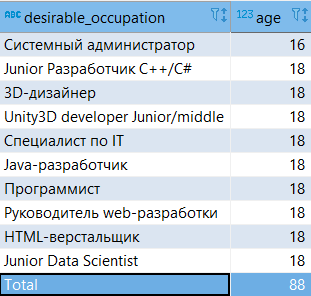

    with spbg_top as (
        select
            cnd.desirable_occupation,
            cnd.age
        from
            hh.candidate as cnd
        join
            hh.city as c on c.id = cnd.city_id
        where
            c.title = 'Санкт-Петербург' and cnd.age between 16 and 21
    )

    (select *
    from 
        spbg_top
    order by 2
    limit 10)

    union all

    (select 
        'Total', 
        count(*)
    from
        spbg_top)

Или второй вариант

    (select
        cnd.desirable_occupation,
        cnd.age
    from
        hh.candidate as cnd
    join
        hh.city as c on c.id = cnd.city_id
    where
        c.title = 'Санкт-Петербург' and cnd.age between 16 and 21
    order by 2
    limit 10)

    union all

    select
        'Total',
        count(*)
    from 
        hh.candidate as cnd
    join
        hh.city as c on c.id = cnd.city_id
    where
       c.title = 'Санкт-Петербург' and cnd.age between 16 and 21

Отличие в том, что в первом случае нам не нужно дублировать запрос для UNION, так как мы занесли его в объект spbg_top.